Naive Bayes Machine Learning

In [1]:
#Librerias de Datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [2]:
#Librerias para entrenar el Modelo
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

In [3]:
#Métricas de validación simple
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [4]:
#Invocacion de Datos
df = pd.read_csv('/content/sample_data/DatosEufratesApp.csv')
#Presentacion de Datos
df

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,V19,V21,V22,V23,V24
0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1996,97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1997,98,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0
1998,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#Presentacion de Datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      2000 non-null   int64
 1   V1      2000 non-null   int64
 2   V2      2000 non-null   int64
 3   V3      2000 non-null   int64
 4   V4      2000 non-null   int64
 5   V5      2000 non-null   int64
 6   V6      2000 non-null   int64
 7   V7      2000 non-null   int64
 8   V8      2000 non-null   int64
 9   V9      2000 non-null   int64
 10  V10     2000 non-null   int64
 11  V11     2000 non-null   int64
 12  V12     2000 non-null   int64
 13  V13     2000 non-null   int64
 14  V15     2000 non-null   int64
 15  V19     2000 non-null   int64
 16  V21     2000 non-null   int64
 17  V22     2000 non-null   int64
 18  V23     2000 non-null   int64
 19  V24     2000 non-null   int64
dtypes: int64(20)
memory usage: 312.6 KB


array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>],
       [<Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>,
        <Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>],
       [<Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V15'}>, <Axes: title={'center': 'V19'}>],
       [<Axes: title={'center': 'V21'}>, <Axes: title={'center': 'V22'}>,
        <Axes: title={'center': 'V23'}>, <Axes: title={'center': 'V24'}>]],
      dtype=object)

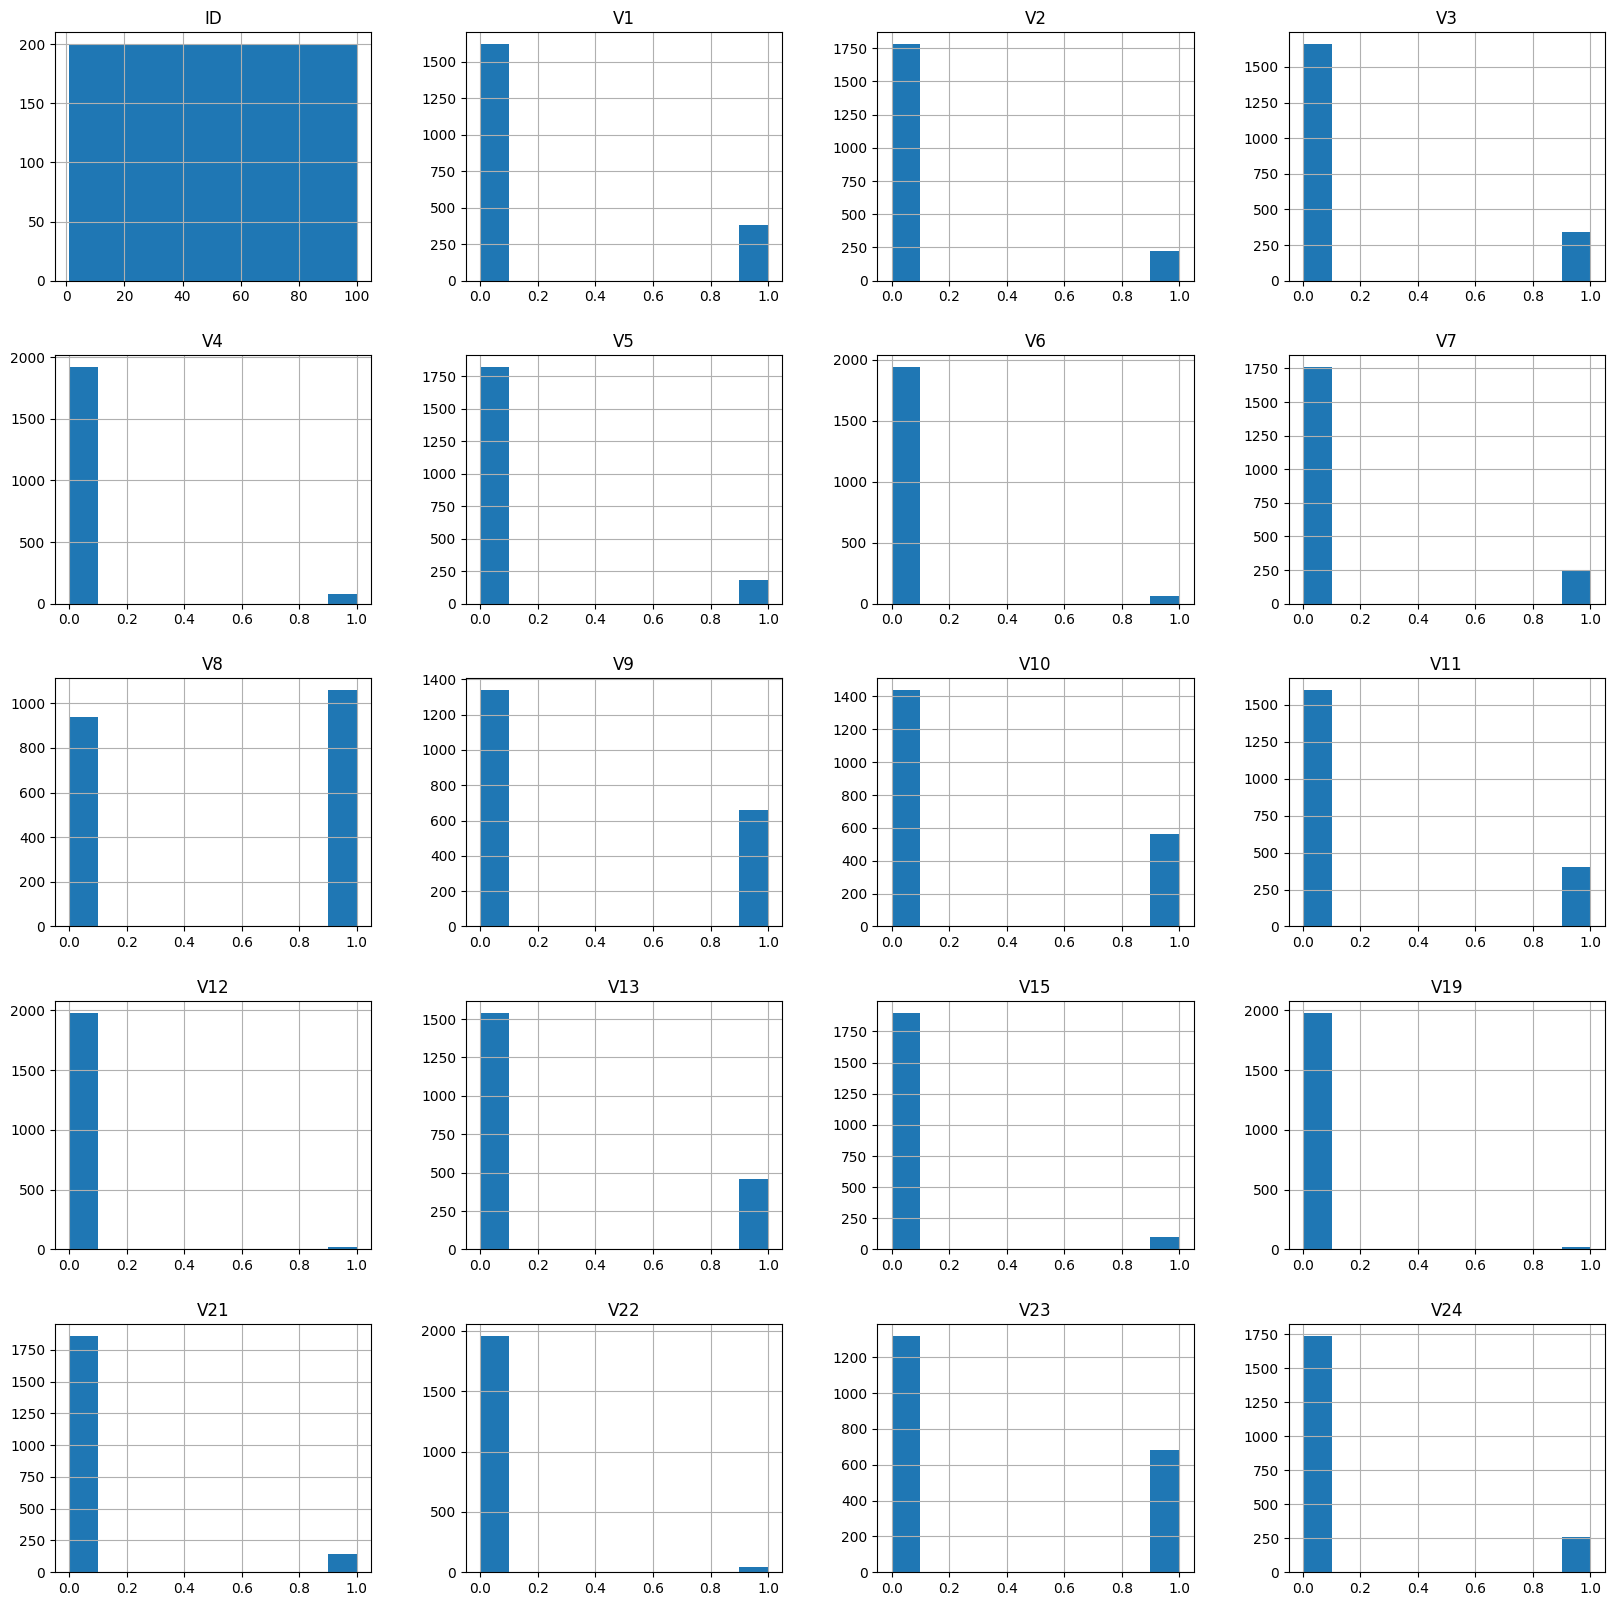

In [6]:
#Grafica Distrubicion de Frecuencias
df.hist(figsize=(20,20))

In [7]:
#Verificacion de Balanceo
pd.value_counts(df.ID)

1      20
64     20
74     20
73     20
72     20
       ..
31     20
30     20
29     20
28     20
100    20
Name: ID, Length: 100, dtype: int64

In [8]:
#Presentacion de Datos - Columnas
df.columns

Index(['ID', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V15', 'V19', 'V21', 'V22', 'V23', 'V24'],
      dtype='object')

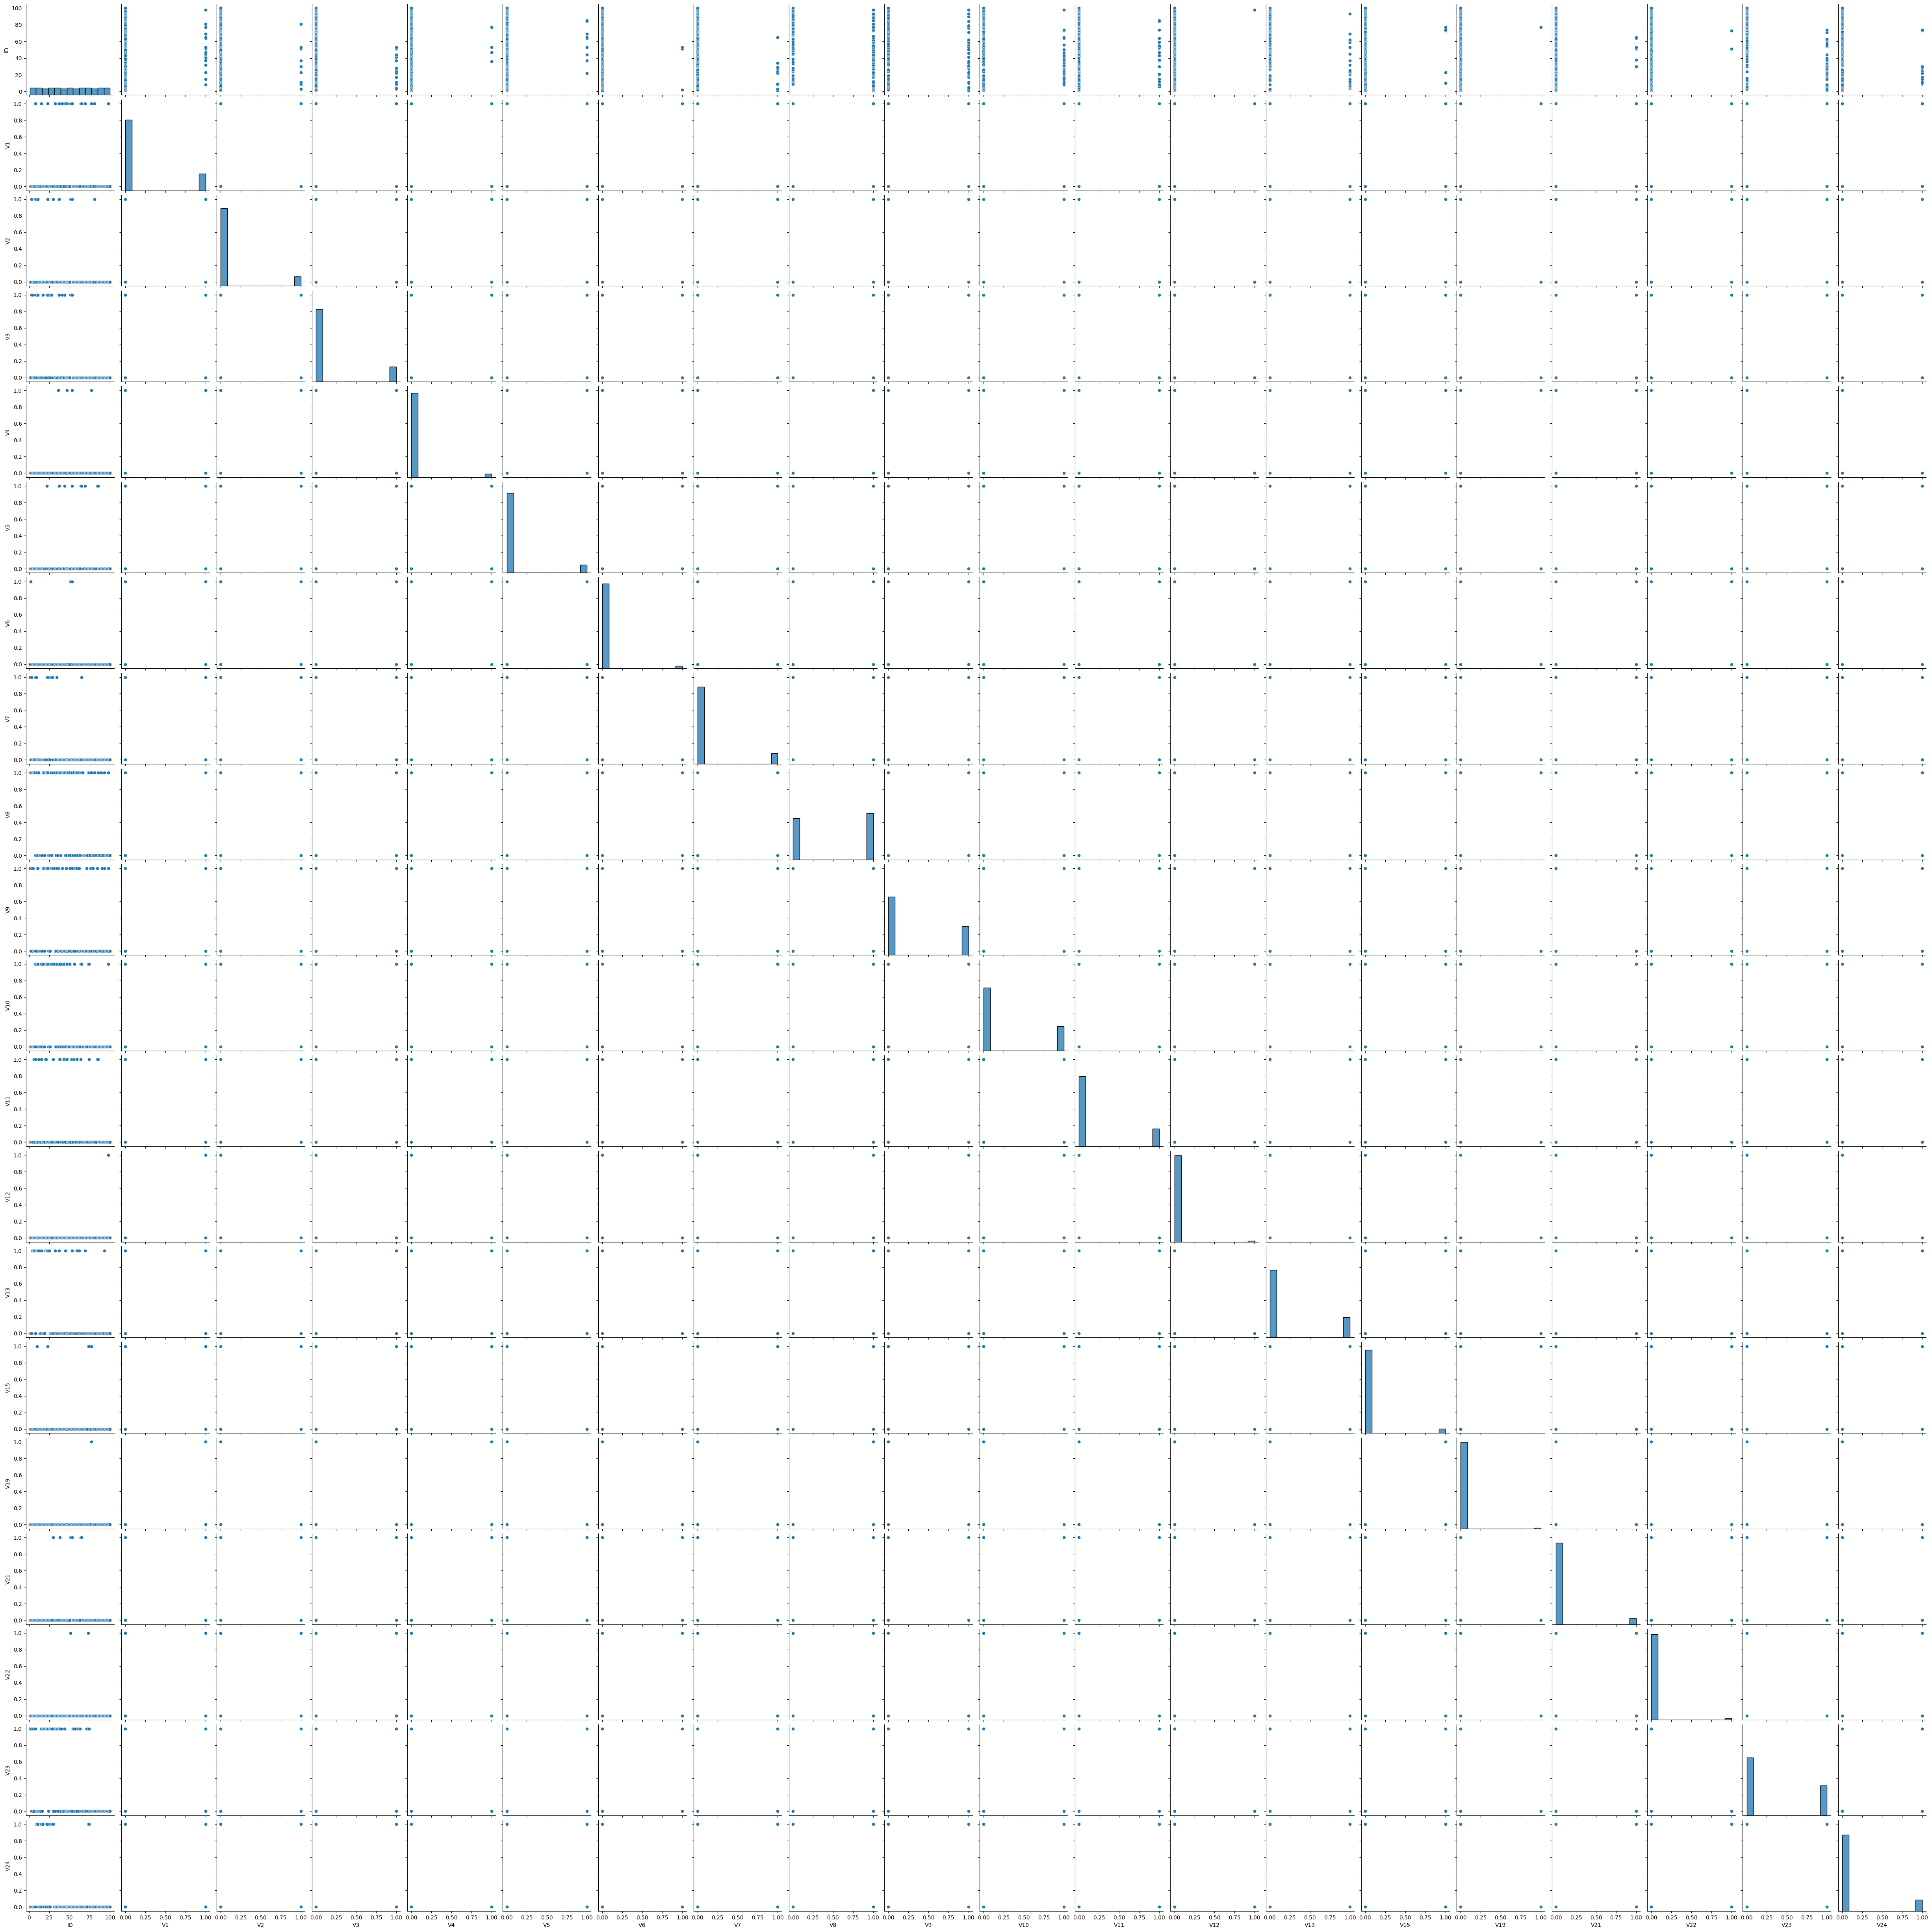

In [9]:
#Matriz de Correlacion de Variables
sns.pairplot(df)

In [10]:
#Generacion de Matriz de Correlacion
matriz_correlacion=df.corr(method='spearman')
matriz_correlacion

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,V19,V21,V22,V23,V24
ID,1.000000,-0.015454,-0.218669,-0.372128,0.019446,0.082920,-0.092401,-0.353931,-0.232872,-0.209604,-0.291648,-0.139437,0.165382,-0.409540,0.007153,0.092266,-0.000679,0.056913,-0.450486,-0.295125
V1,-0.015454,1.000000,0.400010,0.323695,0.291382,0.382117,0.213683,0.056478,0.200718,-0.123059,0.152149,0.203925,0.207514,0.159304,0.122807,0.207514,0.366654,0.112887,-0.024753,-0.111421
V2,-0.218669,0.400010,1.000000,0.606645,0.091334,0.112795,0.312881,0.263579,0.074922,0.093118,0.065486,0.223721,-0.035333,0.187584,0.065989,-0.035333,0.404595,0.178064,-0.049926,0.149203
V3,-0.372128,0.323695,0.606645,1.000000,0.043473,0.229769,0.232529,0.488260,0.106146,0.191930,0.251395,0.039933,-0.045485,0.258732,0.018322,-0.045485,0.188853,0.125503,0.180959,0.379176
V4,0.019446,0.291382,0.091334,0.043473,1.000000,0.114123,0.263251,-0.075378,0.192223,0.073799,0.100017,0.153093,-0.020515,0.009701,0.187317,0.492366,0.144005,-0.029161,-0.146508,-0.078905
V5,0.082920,0.382117,0.112795,0.229769,0.114123,1.000000,0.149532,0.098927,0.156126,0.002229,0.037355,0.279543,-0.031607,0.160253,-0.072148,-0.031607,0.324576,-0.044926,-0.004426,-0.017663
V6,-0.092401,0.213683,0.312881,0.232529,0.263251,0.149532,1.000000,-0.064942,0.048156,0.001247,-0.109670,0.058621,-0.017675,0.043182,-0.040346,-0.017675,0.411260,0.393598,-0.002475,-0.067981
V7,-0.353931,0.056478,0.263579,0.488260,-0.075378,0.098927,-0.064942,1.000000,0.101117,0.264396,0.386547,-0.107705,-0.037113,0.090674,0.056478,-0.037113,0.019297,-0.052753,0.319611,0.406275
V8,-0.232872,0.200718,0.074922,0.106146,0.192223,0.156126,0.048156,0.101117,1.000000,0.320006,0.319507,0.270487,0.094644,0.181396,0.216040,0.094644,0.179828,-0.008587,0.126043,0.066131
V9,-0.209604,-0.123059,0.093118,0.191930,0.073799,0.002229,0.001247,0.264396,0.320006,1.000000,0.414920,0.021267,0.143207,0.172326,0.034153,-0.070535,-0.025839,-0.100259,0.169702,0.234611


<Axes: >

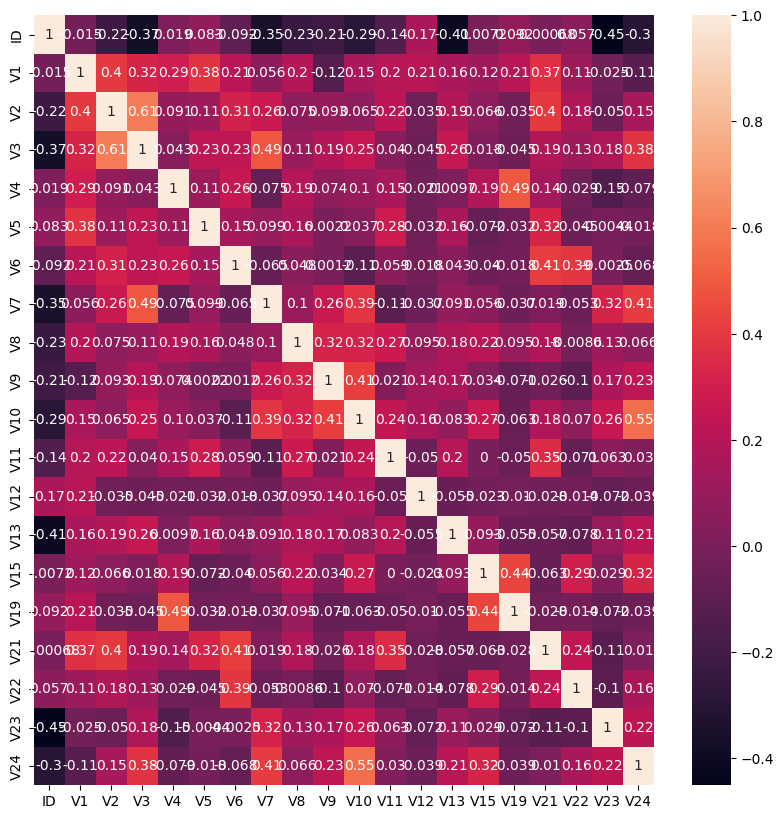

In [11]:
#Mapa de Calor de Correlacion
plt.figure(figsize=(10,10))
sns.heatmap(matriz_correlacion,annot=True)

In [12]:
#Division de Ejes por X y Y
X=df.drop('ID',axis=1)
Y=df.ID
print(len(X),len(Y))

2000 2000


In [13]:
#Dividir datos de prueba de entrenamiento
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=123)
print(len(X_train),len(X_test))

1600 400


In [14]:
#Entrenamiento de Modelo Gaussiano
Modelo_gnb=GaussianNB()
Modelo_Riego=Modelo_gnb.fit(X_train,Y_train)

In [15]:
#Entrenamiento de Modelo Gaussiano
Prediccion_Riego=Modelo_gnb.predict(X_test)

In [16]:
#Entrenamiento de Modelo Gaussiano
Y_test

1342    43
1338    39
189     90
1332    33
1816    17
        ..
1591    92
605      6
319     20
320     21
1302     3
Name: ID, Length: 400, dtype: int64

In [17]:
#Entrenamiento de Modelo Gaussiano
Prediccion_Riego

array([43, 14, 79, 60, 17, 14, 76, 47, 55, 64, 71, 14, 11, 34,  7,  9, 14,
        1, 85, 28,  4, 60, 76, 60, 14, 38, 76, 66, 50, 44, 14, 12, 79, 10,
       51, 43, 18, 14, 14,  3, 46, 23, 14, 50, 14, 46, 66, 66, 36, 66, 14,
       76, 71, 34,  1, 59, 76, 60, 14, 20, 44, 36, 60, 66, 59, 84, 98, 60,
       62, 34, 66, 14, 71, 15, 98, 66, 74, 23, 24, 12, 20, 14, 66, 60, 66,
       14, 65, 14, 62, 60, 65, 93, 14, 14, 84, 40, 24, 66, 14, 14, 14, 60,
       14, 14, 56, 66, 81, 60, 14, 60, 29, 29, 14,  7, 53, 28, 50, 60, 28,
       29, 12, 14, 66, 18, 14, 14, 25, 84, 14, 14, 20, 62, 66, 59, 12, 22,
       62,  9, 24, 22, 66, 25, 69, 74, 30,  1, 40,  2, 29, 14, 79, 85, 14,
        3, 66, 73, 14, 14,  8,  9, 66, 74, 85, 10, 14, 56, 14, 76, 11, 14,
       14, 44, 24, 62, 14, 38, 45, 14, 29, 51, 38, 14,  7, 25, 14, 14, 71,
       66, 66, 60,  3, 32, 27, 43, 93, 14, 14,  4, 14, 79, 38, 47,  2, 14,
       14, 22, 28, 60, 65, 43, 66, 14, 47, 60, 47, 14, 60, 14, 14, 18, 22,
       79, 73, 14, 14, 51

In [18]:
#Entrenamiento de Modelo Gaussiano
accuracy_score(Y_test, Prediccion_Riego)

0.5925

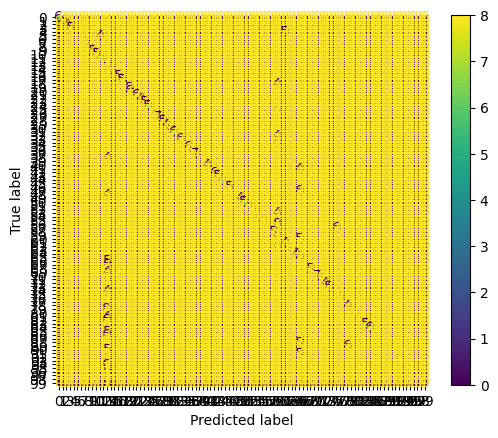

In [19]:
#Entrenamiento de Modelo Gaussiano
matriz=confusion_matrix(Y_test,Prediccion_Riego)
matriz
#Grafica de Matriz de COnfusion
mostrar=ConfusionMatrixDisplay(matriz)
mostrar.plot()
plt.show()

# Comprobacion del Modelo Generado.

Validacion:
Se ingresa Valores de Riego no entrenados:

*   [0,1,0,0,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1]
*   [1,1,0,0,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1]
*   [0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0]
*   [1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0]

Se aplica el modelo y y se Observa el resultado.

In [20]:
# Generacion de Nuevos Datos:
nuevo_Riego=[0,1,0,0,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1]
nuevo_Riego= np.array(nuevo_Riego)
nuevo_Riego.shape
nuevo_Riego=np.reshape(nuevo_Riego,(1,19))
nuevo_Riego.shape
# Presentacion de Resultados:
Modelo_gnb.predict(nuevo_Riego)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([22])

In [21]:
# Generacion de Nuevos Datos:
nuevo_Riego1=[1,1,0,0,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1]
nuevo_Riego1= np.array(nuevo_Riego1)
nuevo_Riego1.shape
nuevo_Riego1=np.reshape(nuevo_Riego1,(1,19))
nuevo_Riego1.shape
# Presentacion de Resultados:
Modelo_gnb.predict(nuevo_Riego1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([23])

In [22]:
# Generacion de Nuevos Datos:
nuevo_Riego2=[0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0]
nuevo_Riego2= np.array(nuevo_Riego2)
nuevo_Riego2.shape
nuevo_Riego2=np.reshape(nuevo_Riego2,(1,19))
nuevo_Riego2.shape
# Generacion de Nuevos Datos:
Modelo_gnb.predict(nuevo_Riego2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([60])

In [23]:
# Generacion de Nuevos Datos:
nuevo_Riego3=[1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0]
nuevo_Riego3= np.array(nuevo_Riego3)
nuevo_Riego3.shape
nuevo_Riego3=np.reshape(nuevo_Riego3,(1,19))
nuevo_Riego3.shape
# Presentacion de Resultados:
Modelo_gnb.predict(nuevo_Riego3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([69])

Validacion:
Se ingresa Valores de Riego Entrenados.

*   [0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0]
*   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Se aplica el modelo y y se Observa el resultado.

In [24]:
# Generacion de Nuevos Datos:
Comprobacion_Riego=[0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0]
Comprobacion_Riego= np.array(Comprobacion_Riego)
Comprobacion_Riego.shape
Comprobacion_Riego=np.reshape(Comprobacion_Riego,(1,19))
Comprobacion_Riego.shape
# Presentacion de Resultados:
Modelo_gnb.predict(Comprobacion_Riego)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [25]:
# Generacion de Nuevos Datos:
Comprobacion_Riego1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
Comprobacion_Riego1= np.array(Comprobacion_Riego1)
Comprobacion_Riego1.shape
Comprobacion_Riego1=np.reshape(Comprobacion_Riego1,(1,19))
Comprobacion_Riego1.shape
# Presentacion de Resultados:
Modelo_gnb.predict(Comprobacion_Riego1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([14])

# Generacion de Modelo de Decision.

In [26]:
# Generacion de Modelo de Decision:
import pickle
# Presentacion de Resultados:
pickle.dump(Modelo_gnb,open('ModeloComprobacionRiego.pkl','wb'))